## Librerias

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline

## Dataframe - Red Socal Tw - Cafe de Tere

In [79]:
# cargar el dataframe
df = pd.read_csv("cafe_de_tere.csv")
df.head()

<ipython-input-79-f53558d5290a>:2: DtypeWarning: Columns (0,1,4,5,6,8,12,13,14,16,17,18,21,26,27,35,98,99,101,102,106,107,109,111,112,115,116,121,125,133,134,141,259,260,261,262,263,264,265,266,267,268,339,340,349,350,351,352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cafe_de_tere.csv")


,Unnamed: 0,contributors,coordinates,created_at,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,...,coordinates.coordinates,coordinates.type,geo.coordinates,geo.type,retweeted_status.quoted_status.quoted_status_id,retweeted_status.quoted_status.quoted_status_id_str,retweeted_status.coordinates.coordinates,retweeted_status.coordinates.type,retweeted_status.geo.coordinates,retweeted_status.geo.type
0,0,NaN,NaN,Fri Nov 08 00:38:50 +0000 2019,0,False,NaN,1.192602e+18,1192602342434234371,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,Fri Nov 08 00:31:15 +0000 2019,1,False,NaN,1.192600e+18,1192600432020996097,FranFerreroMD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,Fri Nov 08 00:02:25 +0000 2019,0,False,NaN,1.192593e+18,1192593176378445826,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,Thu Nov 07 23:31:58 +0000 2019,0,False,NaN,1.192586e+18,1192585514941112326,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,Thu Nov 07 23:25:01 +0000 2019,3,False,NaN,1.192584e+18,1192583767489204225,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Columns: 353 entries, Unnamed: 0 to retweeted_status.geo.type
dtypes: float64(87), object(266)
memory usage: 10.8+ MB


### Subset Dataframe

In [81]:
dfc = df[['user.screen_name', 'created_at','id','text','favorite_count','retweet_count']]

In [82]:
dfc.dtypes

,0
user.screen_name,object
created_at,object
id,float64
text,object
favorite_count,object
retweet_count,object


In [83]:
dfc = dfc.copy()
# convertir object a entero
dfc['favorite_count'] = dfc['favorite_count'].replace('False', 0).fillna(0).astype(int)

## Análisis Exploratorio

In [84]:
dfc[['text', 'favorite_count']]['favorite_count'].sort_values(ascending=False)

,favorite_count
3411,2733
2377,1590
2924,1269
2109,590
2507,532
...,...
1434,0
1435,0
1438,0
1439,0


In [85]:
dfc['retweet_count'].unique()

array([18, 0, 23, 3, 1, 44, 87, 21, 75, 13, 63, 2, 35, 5, 4, 81, 234, 897,
       439, 36, 208, 461, 123, 82, 51, 20, 19, 6, 12, 26, 16, 8, 43, 32,
       14, 11, 37, 38, 25, 7, 10, 17, 24, 49, 347, '439', '32', '897',
       '11', '20', '123', '75', '24', '44', '1', '0', '12', '5', '6',
       '63', '8', '25', '3', '82', '16', '234', '35', '49', '51', '4',
       '10', '43', '2', '37', '38', '14', nan, 'Edison Acosta Ochoa',
       '533', '71', '23', '124', '28090', '92', '645', '588', '476',
       '1866', '273', '31', '221'], dtype=object)

In [86]:
dfc['retweet_count'] = pd.to_numeric(dfc['retweet_count'], errors='coerce').fillna(0).astype(int)

In [87]:
dfc[['text', 'retweet_count']]['retweet_count'].sort_values(ascending=False)

,retweet_count
3486,28090
3514,1866
3022,897
1348,897
2774,897
...,...
2469,0
2482,0
2485,0
2486,0


In [88]:
dfc = dfc.copy()
dfc.drop_duplicates(subset='text', inplace=True)

In [89]:
dfc.reset_index(drop=True, inplace=True)

In [90]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user.screen_name  1198 non-null   object 
 1   created_at        1199 non-null   object 
 2   id                1199 non-null   float64
 3   text              1199 non-null   object 
 4   favorite_count    1200 non-null   int64  
 5   retweet_count     1200 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 56.4+ KB


## Modelo ML - Análisis de Sentimiento

In [91]:
def analizar_sentimientos(textos):
   """
   Realiza análisis de sentimientos en español.


   Args:
       textos (list of str): Lista de textos para analizar.


   Returns:
       list of dict: Lista de resultados con las etiquetas y puntuaciones.
   """
   # Cargar el pipeline de análisis de sentimientos con un modelo multilingüe BERT
   analizador_sentimientos = pipeline(
       "sentiment-analysis",
       model="nlptown/bert-base-multilingual-uncased-sentiment"
   )


   # Analizar cada texto
   resultados = analizador_sentimientos(textos)


   return resultados

In [92]:
textos = [
   "la atencion en este sitio es mala ya quiero volver a casa",
   "eficiente y comodo",
   "Cálida bienvenida, personal eficiente",
   "este sitio es muy bueno y la atencion es de lo mejor",
   "la atencion en este sitio es mala ya quiero volver a casa",
   "espero nunca jamas volver a un lugar tan despreciable y triste como este",
   "Me encanta este producto, es realmente fantástico.",
   "Estoy muy decepcionado con el servicio.",
   "La película fue bastante aburrida.",
   "¡Qué experiencia tan increíble!",
   "No volveré a comprar aquí, pésima atención al cliente."
]

In [93]:
# Realizar análisis de sentimientos
resultados = analizar_sentimientos(textos)

Device set to use cpu


In [94]:
resultados

[{'label': '1 star', 'score': 0.5523920655250549},
 {'label': '5 stars', 'score': 0.5462833642959595},
 {'label': '4 stars', 'score': 0.47046583890914917},
 {'label': '5 stars', 'score': 0.6677964329719543},
 {'label': '1 star', 'score': 0.5523920655250549},
 {'label': '5 stars', 'score': 0.46777117252349854},
 {'label': '5 stars', 'score': 0.9002560377120972},
 {'label': '1 star', 'score': 0.598811149597168},
 {'label': '2 stars', 'score': 0.5871409773826599},
 {'label': '5 stars', 'score': 0.9215057492256165},
 {'label': '1 star', 'score': 0.9018054008483887}]

In [96]:
# ajuste de texto para correr la funcion
opinions = [str(text) for text in dfc['text'].values]

In [97]:
# modelo ml con el dataframe
results = analizar_sentimientos(opinions)

Device set to use cpu


In [98]:
df_tw = pd.DataFrame(results)

In [99]:
df_tw

,label,score
0,5 stars,0.445354
1,3 stars,0.294425
2,1 star,0.455813
3,3 stars,0.303637
4,5 stars,0.534049
...,...,...
1195,3 stars,0.307655
1196,5 stars,0.910485
1197,3 stars,0.380781
1198,5 stars,0.517849


In [100]:
opinionestw = df_tw.groupby('label').count()

## Histplot de Comentarios Calificados

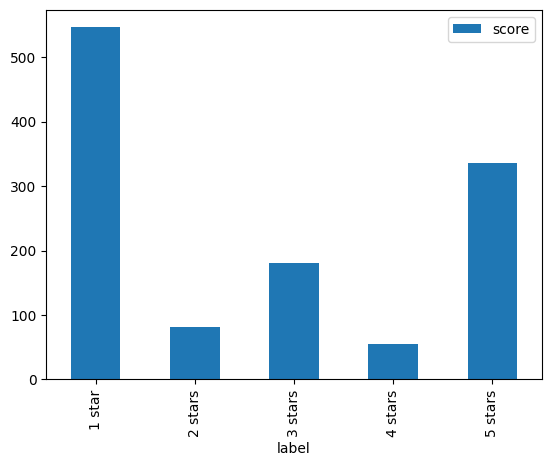

In [102]:
histplot = opinionestw.plot(kind='bar')
plt.show()

In [103]:
df_tw['label'].value_counts(normalize=True)

,proportion
label,
1 star,0.455000
5 stars,0.280000
3 stars,0.150833
2 stars,0.068333
4 stars,0.045833


In [104]:
df_tw['label'].value_counts()

,count
label,
1 star,546
5 stars,336
3 stars,181
2 stars,82
4 stars,55


In [105]:
df_combined = pd.concat([dfc, df_tw], axis=1)

## Matriz de Alcance de Comentarios

In [106]:
df_combined.groupby('label')[['favorite_count', 'retweet_count']].sum()

,favorite_count,retweet_count
label,,
1 star,4502,33532
2 stars,1862,1053
3 stars,1638,2803
4 stars,425,584
5 stars,6191,2671


# Recomendaciones:


Se observa que más del 45% de los comentarios son calificados como Muy Negativos y que el total de comentarios negativos supera el 52%. Es decir que el análisis de sensibilidad de marca en la red social TW, refleja una inconformidad o percepción negativa de los usuarios.


Apenas 28% de los comentarios son calificados como Muy Positivos y el total de comentarios positivos suman 32%.


Con relación al alcance de los comentarios negativos (628), tuvieron un alcance mediante retweet de 34,585 usuarios, es decir que cada comentario negativo se replicó en promedio 55 veces. Mientras que los comentarios positivos (391), tuvieron un alcance de 3,255 usuarios, es decir que se replicaron 8 veces en promedio.


En términos generales, la marca debe buscar atender los comentarios negativos y tomar correctivos, dado que estos además de dominar la percepción de los usuarios tienen un alcance x7 mayor al que podría generar uno positivo.